---
---
---
# ***Project X-Ray: Data Exploration & Pre-Processing V1.0***

![Project Xray Banner](https://raw.githubusercontent.com/Spencer-Long/Project-XRAY/main/Images/xray_banner2.jpg)

### **Data Scientists: Spencer Long** 

**In This Version:** 

* Data pre-processing: checking for data leakage
* Preprocess images properly for the train, validation and test sets
* Implement a weighted loss function to address class imbalance.
* Set up a pre-trained neural network to make disease predictions on chest x-rays.

---
---
---



---
# ***Dependencies:***





### **Accessing Google Drive**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Imports**

In [ ]:
# Import necessary packages.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import seaborn as sns
sns.set()

---
# ***Data:***

**Note:** For those running this notebook on their own personal machines you may place your file path of the data in the code block below replacing my own path. 

In [ ]:
# Location of the data dir. 
data_path_loc_training = '/content/drive/MyDrive/Project_X_Ray/Data/train-small.csv'

# Location of the image dir.
img_dir = '/content/drive/MyDrive/Project_X_Ray/Data/data_viz_sample_images/'

### **Loading In The Training Data**

In [ ]:
# Read csv file containing training data.
train_df = pd.read_csv(data_path_loc_training)

# Print first 5 rows and answering the question of the shape of the data set.
print(f'\n\nThere are {train_df.shape[0]} rows and {train_df.shape[1]} columns in this data frame.\n\n')
train_df.head()



There are 1000 rows and 16 columns in this data frame.




,Image,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,PatientId,Pleural_Thickening,Pneumonia,Pneumothorax
0,00008270_015.png,0,0,0,0,0,0,0,0,0,0,0,8270,0,0,0
1,00029855_001.png,1,0,0,0,1,0,0,0,1,0,0,29855,0,0,0
2,00001297_000.png,0,0,0,0,0,0,0,0,0,0,0,1297,1,0,0
3,00012359_002.png,0,0,0,0,0,0,0,0,0,0,0,12359,0,0,0
4,00017951_001.png,0,0,0,0,0,0,0,0,1,0,0,17951,0,0,0


The csv file contains the names of chest x-ray images ("Image" column) and the columns filled with ones and zeros identify which diagnoses were given based on each x-ray image.

###**Data Exploration**

#####**Data Types & Null Values Check**

  Exploring the data types present in each column and whether any null values exist in the data.

In [ ]:
# Looking at the data type of each column and whether null values are present.
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Image               1000 non-null   object
 1   Atelectasis         1000 non-null   int64 
 2   Cardiomegaly        1000 non-null   int64 
 3   Consolidation       1000 non-null   int64 
 4   Edema               1000 non-null   int64 
 5   Effusion            1000 non-null   int64 
 6   Emphysema           1000 non-null   int64 
 7   Fibrosis            1000 non-null   int64 
 8   Hernia              1000 non-null   int64 
 9   Infiltration        1000 non-null   int64 
 10  Mass                1000 non-null   int64 
 11  Nodule              1000 non-null   int64 
 12  PatientId           1000 non-null   int64 
 13  Pleural_Thickening  1000 non-null   int64 
 14  Pneumonia           1000 non-null   int64 
 15  Pneumothorax        1000 non-null   int64 
dtypes: int64(15), object(1)
m

#####**Unique ID's Check**
\\

**A common occurence with medical data:**

Notice in our dataframe that the "PatientId" has an identification number for each patient. One thing I have learned from experience with this type of medical data is that sometimes you can be looking at repeated data. What I mean by this is that sometimes in one data set a patient can have mulitple images therefor resulting in a single patient being part of more than one row of the data set. In other scenarios you can find that each individual image can represent a different patient thus resulting in every row having its own unique "PatientID".

\\

**Why do we care?:**

As you will see below after running the code cell, the number of unique patients in the dataset is less than the total number of patient ids so there must be some overlap. For patients with multiple records, you'll want to make sure they do not show up in both training and test sets in order to avoid data leakage.

In [ ]:
print(f"The total patient ids are {train_df['PatientId'].count()}, from those the unique ids are {train_df['PatientId'].value_counts().shape[0]}. ")

The total patient ids are 1000, from those the unique ids are 928. 


#####**Exploring The Data Labels**
We will run the next two code cells to create a list of the names of each patient condition or disease to get a better idea of the conditions we are dealing with in this data set.

In [ ]:
columns_train = train_df.keys()
columns_train = list(columns_train)

for disease in columns_train:
  print(disease)

Image
Atelectasis
Cardiomegaly
Consolidation
Edema
Effusion
Emphysema
Fibrosis
Hernia
Infiltration
Mass
Nodule
PatientId
Pleural_Thickening
Pneumonia
Pneumothorax


Now we will remove the PatientID and Image columns as they are not a disease or condition. We will then end up with the number of columns and their associated names (diseases and conditions). 

In [ ]:
# Remove unnecesary elements.
columns_train.remove('Image')
columns_train.remove('PatientId')

# Get the total classes.
print(f"There are {len(columns_train)} columns of labels for these conditions and diseases: \n")

# Prints list of diseases and conditions.
for disease in columns_train:
  print(disease)

There are 14 columns of labels for these conditions and diseases: 

Atelectasis
Cardiomegaly
Consolidation
Edema
Effusion
Emphysema
Fibrosis
Hernia
Infiltration
Mass
Nodule
Pleural_Thickening
Pneumonia
Pneumothorax


#####**Determining The Number of Positive Cases For Each Class**

We will now investigate the number of positive labels (or 1's) for each condition. Remember that 0 is negative for the condition while 1 is positive for this data set. 

In [ ]:
# Print out the number of positive labels for each class
for disease in columns_train:
  print(f"The class {disease} has {train_df[disease].sum()} samples.")

The class Atelectasis has 106 samples.
The class Cardiomegaly has 20 samples.
The class Consolidation has 33 samples.
The class Edema has 16 samples.
The class Effusion has 128 samples.
The class Emphysema has 13 samples.
The class Fibrosis has 14 samples.
The class Hernia has 2 samples.
The class Infiltration has 175 samples.
The class Mass has 45 samples.
The class Nodule has 54 samples.
The class Pleural_Thickening has 21 samples.
The class Pneumonia has 10 samples.
The class Pneumothorax has 38 samples.


---
#***Data Visualization***

The fun part of any science has finally arrived! Pretty pictures, plots, and graphs to help us further understand the data  and problems we are working with. Lets check out some cool X-Rays! 
\
\
Using the image names listed in the csv file (the "Image" column), you can retrieve the image associated with each row of data in your dataframe.
\
\
Run the cell below to visualize a random selection of images from the dataset. Be sure that the correct file path is associated with where you are storing the images data folder. Note that we alocated these file paths at the start of this notebook in the "Data" section.

Display Images


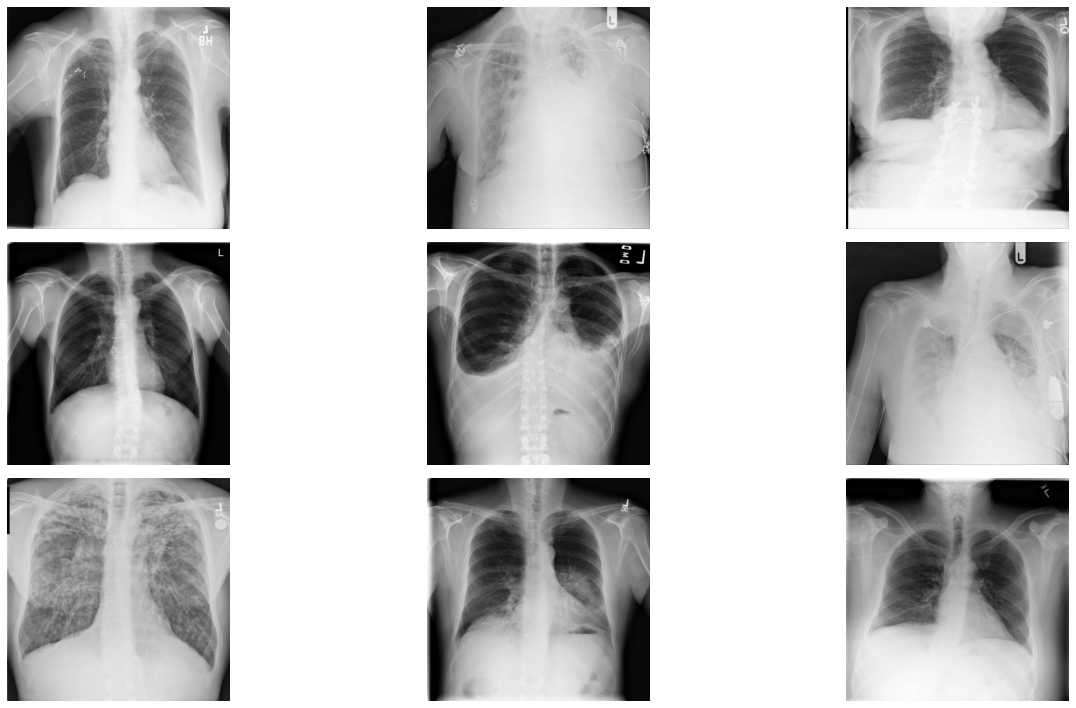

In [ ]:
# Extract 9 images.
random_images = ['00000003_001.png',  '00000032_039.png',	'00000111_000.png',
                 '00000020_001.png',	'00000099_013.png',	'00000116_034.png',
                 '00000022_000.png',	'00000103_000.png',	'00000121_008.png']

print('Display Images')

# Adjust the size of your images.
plt.figure(figsize=(20,10))

# Iterate and plot images.
for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(img_dir, random_images[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
# Adjust subplot parameters to give specified padding.
plt.tight_layout() 

###**Investigating a Individual Image**

The dimensions of the image are 1024 pixels width and 1024 pixels height, one single color channel
The maximum pixel value is 1.0000 and the minimum is 0.0000
The mean value of the pixels is 0.4059 and the standard deviation is 0.2959


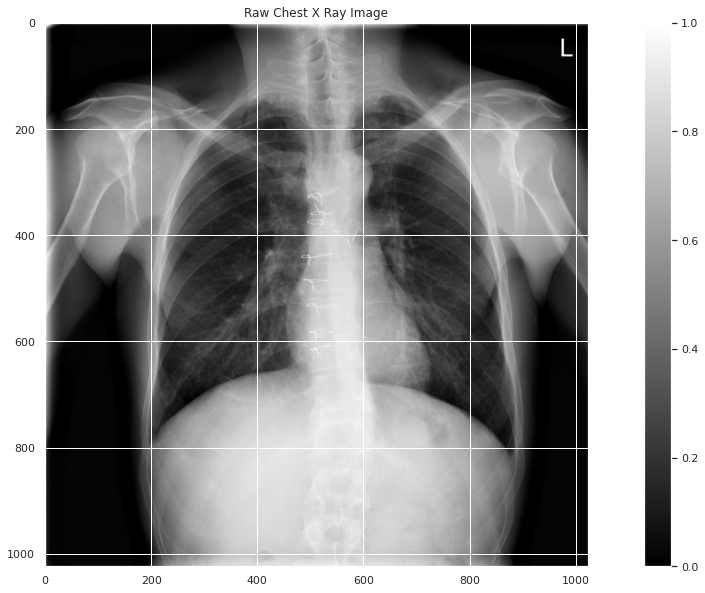

In [ ]:
# Get the first image that was listed in the train_df dataframe
sample_img = '00000020_001.png'
raw_image = plt.imread(os.path.join(img_dir, sample_img))

# Plot Settings
plt.figure(figsize=(20,10))
plt.imshow(raw_image, cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')

print(f"The dimensions of the image are {raw_image.shape[0]} pixels width and {raw_image.shape[1]} pixels height, one single color channel")

print(f"The maximum pixel value is {raw_image.max():.4f} and the minimum is {raw_image.min():.4f}")

print(f"The mean value of the pixels is {raw_image.mean():.4f} and the standard deviation is {raw_image.std():.4f}")

###**Investigating Pixel Value Distribution**

Text(0, 0.5, '# Pixels in Image')

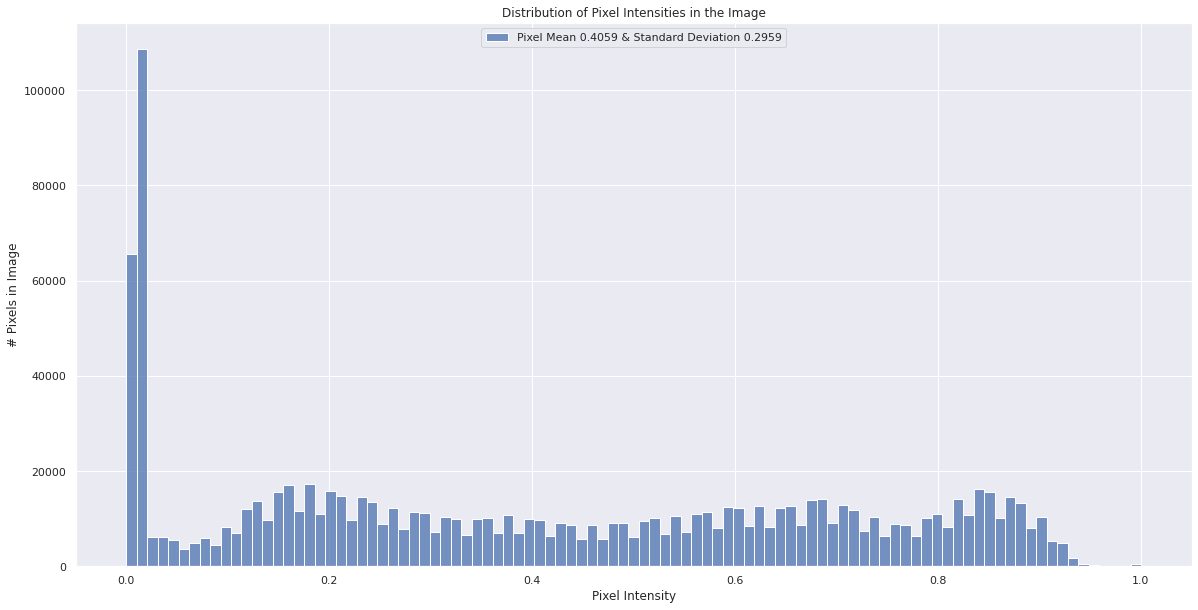

In [37]:
# Plot a histogram of the distribution of the pixels
plt.figure(figsize=(20,10))
sns.histplot(raw_image.ravel(), 
             label=f'Pixel Mean {np.mean(raw_image):.4f} & Standard Deviation {np.std(raw_image):.4f}', kde=False)
plt.legend(loc='upper center')
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixels in Image')